## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape

(294478, 5)

<font color=blue>The number of rows are 294478</font>

c. The number of unique users in the dataset.

In [4]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [5]:
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
A=df.query('group == "treatment" and landing_page == "old_page"').count()[0]
B=df.query('group == "control" and landing_page == "new_page"').count()[0]
print(A+B)

3893


f. Do any of the rows have missing values?

In [7]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df2=df.query('(group == "treatment" and landing_page == "new_page") or (group == "control" and landing_page == "old_page")')

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
print(df2['user_id'].nunique())

#from this function we know how many repeated users in the dataframe
print(df2['user_id'].duplicated().sum())

290584
1


b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
#this finction will show the row numbers and the user id for the repeated
df2.user_id[df2['user_id'].duplicated()]

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [12]:
#this finction will show all the row information for the repeated
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
df2.drop([2893],inplace=True)

C:\Users\t33h3\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
T=df2['converted']
T.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
W=df2.query('group == "control"')['converted']
W.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
Q=df2.query('group == "treatment"')['converted']

d. What is the probability that an individual received the new page?

In [17]:
A=df2.landing_page == "new_page"
A.mean()

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.


#### <font color=green>We want to discover if there is one pages influence more conversation , so we have the overall probability for conversation ,the probability of old page conversation and and the probability of new page conversation respectively  11.95% , 12.04% , 11.88%</font>
#### <font color=green|blue|red> I don’t think there is big evidence that the new or old pages influence the number of conversation , the difference in old pages conversation to the overall probability is 0.08% increase which is very small</font>

#### <font color=green|blue|red> The difference in new page conversation to the overall probability is 0.08% decrease which is very smallwe can’t conclude that the new treatment page leads to more conversions.</font>


---

---



<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

---

#### <font color=blue|green> The Null hypothesis: The new page is not better than the old page , so (even worse or as good as the old )</font>

$$H_0: p_{new} - p_{old}  < = 0$$

---

#### <font color=blue|green> The Alternative hypothesis : The new page is  better than the old page </font>

$$H_1: p_{new} - p_{old}    >  0$$

---

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [24]:
P_new = df2.converted.mean()
P_new

0.11959708724499628

#### <font color=pink>so conversion rate for new pages is  11.96%</font>

---

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [25]:
P_old = df2.converted.mean()
P_old

0.11959708724499628

#### <font color=pink>so conversion rate for old pages is  11.96%</font>

---

c. What is $n_{new}$?

In [21]:
#new_all is all the users landing new page who converted and not coverted 
new_all=df2.query("landing_page == 'new_page'")
n_new=new_all.converted.count()
n_new

145310

d. What is $n_{old}$?

In [22]:
#old_all is all the users landing old page who converted and not coverted 
old_all=df2.query("landing_page == 'old_page'")
n_old=old_all.converted.count()
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [26]:
#using numpy.random.binomial(n, p, size)
#size=n_new ,  p=P_new  , n=[0,1]
new_page_converted = np.random.binomial(1,P_new, n_new)
P_new_mean = new_page_converted.mean()
P_new_mean

0.11948248572018444

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [27]:
#using numpy.random.binomial(n, p, size)
#size=n_old ,  p=P_old  , n=[0,1]
old_page_converted = np.random.binomial(1, P_old, n_old)
P_old_mean = old_page_converted.mean()
P_old_mean

0.11906466401420764

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [28]:
diff= P_new_mean  -  P_old_mean
diff

0.00041782170597680357

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [29]:
#I use two ways in this simulation , the plot will show you how it is same 
#first way

A=np.random.binomial(n_new, P_new, 10000)/n_new
B=np.random.binomial(n_old, P_old, 10000)/n_old
p_diffs = A-B



#Second way

p_diffsR = []
for _ in range(10000):
    A=np.random.binomial(n_new, P_new)
    B=np.random.binomial(n_old, P_old)
    diff = A/n_new - B/n_old
    p_diffsR.append(diff)

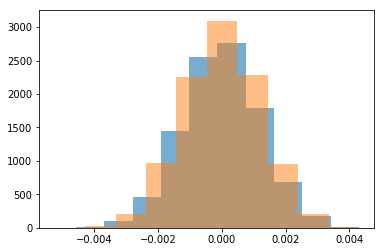

In [30]:
plt.hist(p_diffs, alpha = 0.6);
plt.hist(p_diffsR, alpha = 0.5);


#### <font color= blue|pink|blue>From the graphs I confirmed that it is both normal distributions</font>

---

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

It is as I expected , a normal distribution
The range for confidence interval which is from -0.0030233709679573554 to 0.003067544691475837
The shaded area shows the range of sample means that you’d obtain 95% of the time 
using our sample mean as the point estimate of the population mean. 
This range is our 95% confidence interval

As I understand ,If the confidence interval not contain the null hypothesis value, the results are statistically significant, 
so here is the oppisite , most data are within the confidence range  
so  it look like that null hypothesized value did generate our statistic


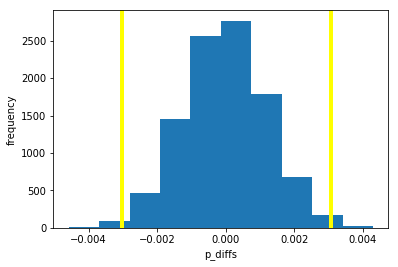

In [31]:
plt.hist(p_diffs)

left_bound=  np.percentile(p_diffs, 0.5)
right_bound=np.percentile(p_diffs, 99.5)
plt.axvline(x=left_bound, color='yellow', linewidth=4);
plt.axvline(x=right_bound, color='yellow', linewidth=4);
plt.xlabel("p_diffs")
plt.ylabel("frequency");


print('It is as I expected , a normal distribution')

print('The range for confidence interval which is from' ,left_bound ,'to',right_bound)

print('The shaded area shows the range of sample means that you’d obtain 95% of the time \nusing our sample mean as the point estimate of the population mean. \nThis range is our 95% confidence interval')

print('\nAs I understand ,If the confidence interval not contain the null hypothesis value, the results are statistically significant, \nso here is the oppisite , most data are within the confidence range  \nso  it look like that null hypothesized value did generate our statistic')


j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [32]:
control_all = df2.query("group == 'control'")
n_contol= control_all.converted.mean()


treatment_all = df2.query("group == 'treatment'")
n_treatment= treatment_all.converted.mean()

actual_difference = n_treatment - n_contol



# Compute p-value

(p_diffs > actual_difference).mean()

0.9027

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

#### <font color=blue|yellow|blue>In part j we find p-value , the proportion of the p_diffs are greater than the actual difference. The p-value is the probability of observing your statistic (or one more extreme in favor of the alternative) if the null hypothesis is true becuase p-value=0.9 it is much higher than the (alpha) type one error 0.05 , so we fail to reject the null hypothesis suggest the new page conversion rate is higher than the old rate.</font>



---




l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [33]:
import statsmodels.api as sm


#new_all is all the users landing new page who converted and not coverted 
#As we calculate new_all in part c and d
#new_all=df2.query("landing_page == 'new_page'")
#old_all=df2.query("landing_page == 'old_page'")

N_new=new_all.count()[0]
convert_new=new_all[new_all.converted==1].count()[0]

N_old=old_all.count()[0]
convert_old =old_all[old_all.converted==1].count()[0]


print('Number of individuals who received new page',N_new)
print('Number of individuals who received old page',N_old)

print("Number of conversions for new page",convert_new)
print("Number of conversions for old page",convert_old )

Number of individuals who received new page 145310
Number of individuals who received old page 145274
Number of conversions for new page 17264
Number of conversions for old page 17489


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [34]:
#in the next formula we have last word is 'larger' , I will explain what doest it mean in the following,
#smaller means that the alternative hypothesis is p_new < p_old 
#larger means p_new > p_old 
#here we assume at first that p_new=p_old so it doesn't effect the result a lot , basically same answer 

z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [N_new, N_old], alternative='larger')
print(z_score)
print(p_value)


-1.3109241984234394
0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

#### <font color=blue|red|green|pink|yellow> We got z-score and p-value for z-test which is about -1.311 and 0.905 respectively. We fail to reject the null hypothesis since p-value is very high 0.9>0.05 and we got Negative value for z-score .</font>

---

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

### <font color=blue|red|green> Logistic Regression. </font>

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [35]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [36]:
df2['intercept'] = 1
df2[['control','treatment']] = pd.get_dummies(df['group'])
df2.head()

C:\Users\t33h3\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\t33h3\Anaconda3\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,user_id,timestamp,group,landing_page,converted,intercept,control,treatment
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


In [37]:
df2.drop('control', axis=1 , inplace = True)
df2.rename(columns={'treatment':'ab_page'}, inplace=True)

C:\Users\t33h3\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
C:\Users\t33h3\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [38]:
import statsmodels.api as sm
A = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = A.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [39]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 25 Oct 2019   Pseudo R-squ.:               8.077e-06
Time:                        18:43:09   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

#### This P-value = 0.19 is for ab_page column , it is much higher than the (alpha) type one error which  is 0.05 but this P-value is less than the value of p-value for the z-score what we also calculated. In part two we have one side test but here we have two sides test.

#### This P-value mean that in predict the converted rate , the landing page is not very important .

#### <font color=blue>Using z-score (part two):</font>
Null hypothesis :           P_old ≥ P_new
Alternate hypothesis :      P_old < P_new


#### <font color=blue>Here:</font>
Null hypothesis :           P_old = P_new
Alternate hypothesis :      P_old ≠ P_new


----

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

#### <font color=blue|yellow|green>Consider other variables and factors will increase the accuracy or I can say the model fitting more precisely (less error) . Also It will help us to  know the correct causes that make people convert or not to the new page. For example the age of users will effect the model .</font>


#### <font color=blue|yellow|green>On the other hand , there are some problems when we add many factors it might cause to unreliable estimates of regression coefficients (Multicollinearity) .Also we should consider Change aversion and Novelty effect</font>



As we learned in lesson 13 , case study A/B tests

Change Aversion: Existing users may give an unfair advantage to the old version, simply because they are unhappy with change, even if it’s ultimately for the better.

Novelty Effect: Existing users may give an unfair advantage to the new version, because they’re excited or drawn to the change, even if it isn’t any better in the long run.


---

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [40]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [41]:
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [42]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [43]:
df_new.country.value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

##### <font color=pink>So now I know what is the dummy I need to create</font>

---

In [44]:
### Create the necessary dummy variables
df_new['intercept'] = 1
df_new[['US','UK','CA']]=pd.get_dummies(df_new['country'])
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,US,UK,CA
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [45]:
### Fit Your Linear Model And Obtain the Results
U = sm.Logit(df_new['converted'], df_new[['intercept',  'US','UK']])
results = U.fit()
results.summary()


Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Fri, 25 Oct 2019   Pseudo R-squ.:               1.521e-05
Time:                        18:46:19   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
US            -0.0408      0.027     -1.518      0.129      -0.093       0.012
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

##### <font color=blue>This P-value = 0.19 is for countries, it is much higher than the (alpha) type one error which  is 0.05. This P-value mean that in predict the converted rate, the countries coloumns are not very effect on conversation rate. we fail to reject the null hypothesis</font>
##### <font color=blue>If we look specifically in the details ,from the regression we can see that p-value in UK is more higher than the in US . It mean users in canada are more likely to convert but overall it is not siginicant.</font>

---

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [46]:
#We need first to find interaction between countries coloumns and page column

df_new['ab_CA']=df_new.ab_page*df_new.CA
df_new['ab_UK']=df_new.ab_page*df_new.UK
df_new['ab_US']=df_new.ab_page*df_new.US

df_new.head()


,country,timestamp,group,landing_page,converted,intercept,ab_page,US,UK,CA,ab_CA,ab_UK,ab_US
user_id,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,1,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,0,1,0


In [47]:
k = sm.Logit(df_new['converted'], df_new[['intercept','ab_US','ab_UK']])
results = k.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Fri, 25 Oct 2019   Pseudo R-squ.:               2.364e-05
Time:                        18:47:53   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                   0.08085
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9963      0.006   -322.049      0.000      -2.008      -1.984
ab_US         -0.0752      0.038     -1.997      0.046      -0.149      -0.001
ab_UK          0.0149      0.017      0.862      0.389      -0.019       0.049
==============================================================================
"""

#### <font color=blue|green> There is no much  impact on the conversation by the interaction between country and page  because  p-value=0.08 are above the (alpha) type one error which is 0.05 so This  all P-value mean that in predict the converted rate. </font>
#### <font color=blue|green> If we look specifically in the details ,from the regression we can see that p-value for an interaction between country and page on the conversion rate  in UK is more higher than the in US. </font>
#### <font color=blue|green>The contriy and page interaction coloumn is not very important  .we fail to reject the null hypothesis.</font>

---

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.